In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import seaborn
from sklearn import svm

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
test_df["employee1"] = train_df["employee1"].astype("str").str.replace(",", "").astype("float")
test_df["employee2"] = train_df["employee2"].astype("str").str.replace(",", "").astype("float")

In [5]:
train_df["employee1"] = train_df["employee1"].astype("float")
train_df["employee2"] = train_df["employee2"].astype("float")
train_df["OC"] = train_df["OC"].astype("str").str.replace(" ", "")

In [6]:
train_test_df = train_df.append(test_df)

In [7]:
train_df

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,9.423771e+09,2.618201e+09,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,6.392336e+08,6.400000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN


In [8]:
train_test_df

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228.0,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401.0,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228.0,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814.0,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901.0,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,424,NaN,jeonnam,33,20011012.0,0.0,traditional_clinic,2.233031e+10,8.484657e+08,1.849255e+10,...,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.000000e+00,87.0,90.0,NaN
123,425,NaN,gyeonggi,74,20010530.0,NaN,traditional_hospital,1.833906e+10,0.000000e+00,1.760117e+10,...,3.176628e+09,1.376742e+09,0.000000e+00,1.799886e+09,1.740000e+09,8.574502e+09,7.136681e+09,125.0,125.0,same
124,429,NaN,gyeonggi,116,20010101.0,150.0,hospital,1.424266e+10,1.726174e+09,1.148722e+10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,54.0,57.0,NaN
125,430,NaN,jeju,76,20010201.0,NaN,NaN,4.892710e+10,4.157148e+10,4.721485e+09,...,3.720397e+10,8.485918e+09,0.000000e+00,2.871805e+10,2.563120e+10,-2.050629e+08,0.000000e+00,105.0,113.0,same


In [9]:
factor_columns = train_test_df.select_dtypes(include = ['object']).columns
numeric_columns = train_test_df.columns.difference(factor_columns)

In [10]:
train_test_df.loc[train_test_df.inst_id == 430, ['instkind']] = 'dental_clinic'
train_test_df.loc[train_test_df.inst_id == 430, ['bedCount']] = 0
train_test_df.loc[train_test_df.inst_id == 413, ['bedCount']] = -999

In [11]:
train_test_df[factor_columns] = train_test_df[factor_columns].fillna("Not_Sure")

In [12]:
train_test_df[numeric_columns] = train_test_df[numeric_columns].fillna(-999)

In [13]:
train_test_df

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228.0,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401.0,410.0,general_hospital,-9.990000e+02,-9.990000e+02,-9.990000e+02,...,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,801.0,813.0,same
2,4,open,gyeonggi,89,20161228.0,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814.0,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901.0,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,424,Not_Sure,jeonnam,33,20011012.0,0.0,traditional_clinic,2.233031e+10,8.484657e+08,1.849255e+10,...,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.000000e+00,87.0,90.0,Not_Sure
123,425,Not_Sure,gyeonggi,74,20010530.0,-999.0,traditional_hospital,1.833906e+10,0.000000e+00,1.760117e+10,...,3.176628e+09,1.376742e+09,0.000000e+00,1.799886e+09,1.740000e+09,8.574502e+09,7.136681e+09,125.0,125.0,same
124,429,Not_Sure,gyeonggi,116,20010101.0,150.0,hospital,1.424266e+10,1.726174e+09,1.148722e+10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,54.0,57.0,Not_Sure
125,430,Not_Sure,jeju,76,20010201.0,0.0,dental_clinic,4.892710e+10,4.157148e+10,4.721485e+09,...,3.720397e+10,8.485918e+09,0.000000e+00,2.871805e+10,2.563120e+10,-2.050629e+08,0.000000e+00,105.0,113.0,same


In [14]:
fac_le = LabelEncoder()

In [15]:
train_test_df[factor_columns] = train_test_df.loc[: , factor_columns].apply(lambda x: fac_le.fit_transform(x))

In [16]:
train_test_df

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,2,2,73,20071228.0,175.0,5,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,2
1,3,2,9,32,19970401.0,410.0,3,-9.990000e+02,-9.990000e+02,-9.990000e+02,...,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,801.0,813.0,2
2,4,2,8,89,20161228.0,468.0,5,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,2
3,7,2,10,141,20000814.0,353.0,3,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,2
4,9,2,9,32,20050901.0,196.0,3,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,424,0,13,33,20011012.0,0.0,6,2.233031e+10,8.484657e+08,1.849255e+10,...,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.000000e+00,87.0,90.0,0
123,425,0,8,74,20010530.0,-999.0,7,1.833906e+10,0.000000e+00,1.760117e+10,...,3.176628e+09,1.376742e+09,0.000000e+00,1.799886e+09,1.740000e+09,8.574502e+09,7.136681e+09,125.0,125.0,2
124,429,0,8,116,20010101.0,150.0,4,1.424266e+10,1.726174e+09,1.148722e+10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,54.0,57.0,0
125,430,0,11,76,20010201.0,0.0,2,4.892710e+10,4.157148e+10,4.721485e+09,...,3.720397e+10,8.485918e+09,0.000000e+00,2.871805e+10,2.563120e+10,-2.050629e+08,0.000000e+00,105.0,113.0,2


In [17]:
train_df = train_test_df.loc[train_test_df["OC"] != 0, :]
test_df = train_test_df.loc[train_test_df["OC"] == 0, :]
train_df["OC"] = train_df["OC"] - 1

<ipython-input-17-b77c908f4a6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["OC"] = train_df["OC"] - 1


In [18]:
train_df

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1,2,73,20071228.0,175.0,5,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,2
1,3,1,9,32,19970401.0,410.0,3,-9.990000e+02,-9.990000e+02,-9.990000e+02,...,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,801.0,813.0,2
2,4,1,8,89,20161228.0,468.0,5,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,2
3,7,1,10,141,20000814.0,353.0,3,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,2
4,9,1,9,32,20050901.0,196.0,3,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,1,13,178,20050211.0,214.0,5,7.614697e+09,4.153475e+08,5.903119e+09,...,9.423771e+09,2.618201e+09,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,2
297,423,0,2,159,20140618.0,-999.0,4,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,2
298,426,0,7,107,19830705.0,-999.0,4,0.000000e+00,0.000000e+00,5.479428e+07,...,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,-999.0,-999.0,0
299,427,0,8,169,20070101.0,180.0,5,2.116892e+09,2.681748e+08,3.286245e+09,...,6.392336e+08,6.400000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,-999.0,0


In [19]:
sub_id = test_df.inst_id
dep = ['OC']
indep = train_test_df.columns.difference(dep)

In [20]:
train_X = train_df[indep]
train_Y = train_df[dep]
test_X = test_df[indep]

In [21]:
np.random.seed(100)
RF = RandomForestClassifier(n_estimators=40, max_features=20)
RF_model = RF.fit(train_X, train_Y)
RF_prd = RF.predict(test_X)
RF_prd_prob = RF.predict_proba(test_X)

<ipython-input-21-45913d3c69d4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model = RF.fit(train_X, train_Y)


In [22]:
RF_prd

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [23]:
submission = pd.DataFrame(sub_id)

In [24]:
submission["OC"] = RF_prd

In [25]:
submission.to_csv("submission.csv", index=False)

In [26]:
# RF_model.feature_importances_
test_df.columns

Index(['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind',
       'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2',
       'employee1', 'employee2', 'ownerChange'],
      dtype='object')

C:\Users\user\anaconda3\envs\kaggle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

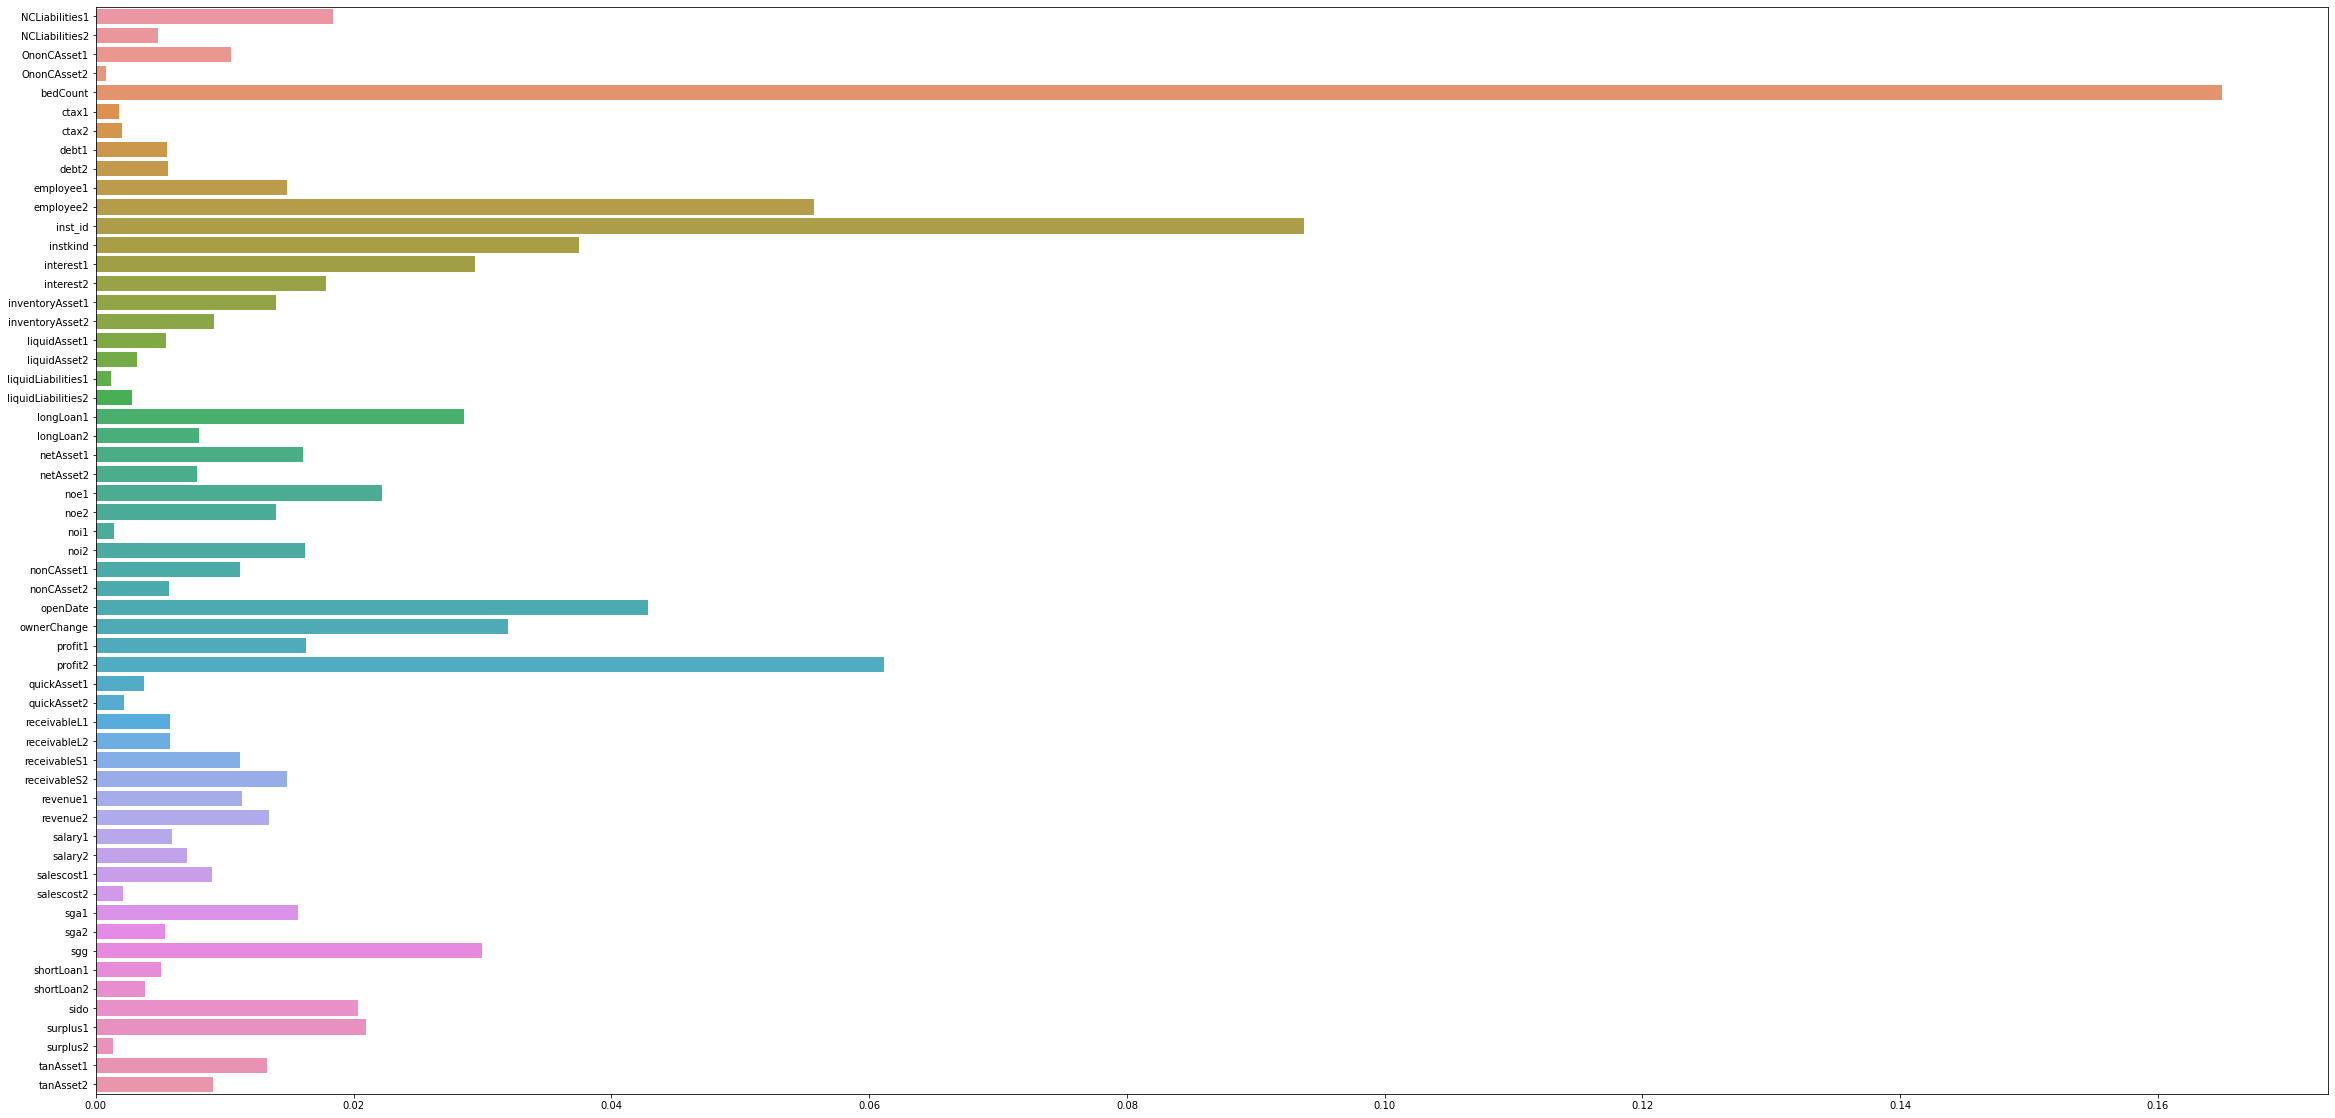

In [27]:
plt.figure(figsize=(40,20))
seaborn.barplot(RF_model.feature_importances_, test_X.columns)

In [28]:
columns_weights = list(zip(test_X.columns, RF_model.feature_importances_))
columns_weights.sort(key = lambda x : x[1], reverse=True)
# columns_weights
svm_columns = [(columns_weights[x])[0] for x in range(3)]
svm_columns.remove('inst_id')
svm_columns

['bedCount', 'profit2']

In [29]:
svm_train_x = train_X[svm_columns]
svm_train_y = train_Y.OC
svm_test_x = test_X[svm_columns]
svm_train_y

0      1
1      1
2      1
3      1
4      1
      ..
296    1
297    0
298    0
299    0
300    1
Name: OC, Length: 301, dtype: int32

In [1]:
svm_clf = svm.SVC()
# svm_clf.fit(svm_train_x, svm_train_y)
svm_clf.fit(train_X, train_Y.OC)

NameError: name 'svm' is not defined

In [ ]:
# svm_clf.predict(svm_train_x)
svm_clf.predict(test_X)
# len(test_X)